# Face detection

Face detection is often achieved by using *cascading classifiers*. A cascading classifier is a type of ensemble method where learners are used sequentially. In other terms cascading classifiers employ boosting method. A popular method is cost-aware ADAboost. skimage provides pre-trained models.

In [7]:
# imports
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature
from im_func import show_image, show_multi_image
import seaborn as sns
from skimage import transform

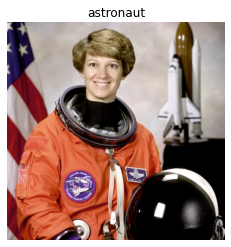

In [5]:
# Load stock image using function
title = 'astronaut'
image = getattr(ski.data, title)()

_ = show_image(image, title)

In [8]:
# Import a pre-trained model to detect frontal faces
trained_file = ski.data.lbp_frontal_face_cascade_filename()

# Initialize detector
detector = ski.feature.Cascade(trained_file)

# Apply the detector on the image

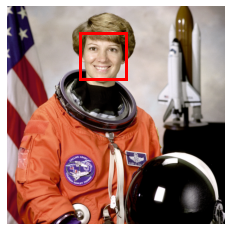

In [43]:
detected = detector.detect_multi_scale(img = image, 
                                       scale_factor = 1.2,
                                       step_ratio = 1,
                                       min_size=(30,30),
                                       max_size=(200,200))

# Plotting the face ID rectangle
show_image(image)
for rect in detected:
    x0, y0 = rect['c'], rect['r']
    x1, y1 = rect['c']+rect['height'], rect['r']+rect['width']
    plt.fill([x0,x0,x1,x1],
             [y0,y1,y1,y0],
             facecolor='none',edgecolor='r',lw=3)

# Blurring a face

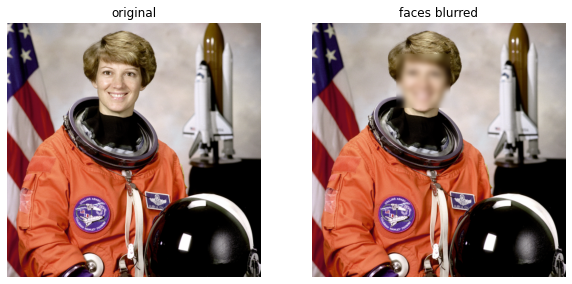

In [41]:
image_blurred = image.copy()
for rect in detected:
    x0, y0 = rect['c'], rect['r']
    x1, y1 = rect['c']+rect['height'], rect['r']+rect['width']
#     image_blurred[y0:y1,x0:x1] = ski.filters.gaussian(image[y0:y1,x0:x1], sigma=0.0)
    temp = ski.filters.gaussian(image[y0:y1,x0:x1], sigma=5.0,preserve_range=True)
    image_blurred[y0:y1,x0:x1] = temp
_ = show_multi_image(((image,'original'),
                      (image_blurred, 'faces blurred')),
                      figsize=[10,10])  